In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import  shuffle

In [2]:
df_0_1 = pd.read_csv("./Data_clean/min_max_0_1.csv") 

In [3]:
df_0_1

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000631,0.000727,0.000597,0.000798,0.000439,0.000576,0.000621,0.000535,0.000734,0.000675
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000963,0.001617,0.001315,0.001450,0.001718,0.001258,0.001240,0.001152,0.001138,0.001367
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001127,0.001362,0.001273,0.001249,0.001570,0.001370,0.001199,0.001366,0.001159,0.001173
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.000874,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,...,0.001250,0.000921,0.000625,0.000512,0.000489,0.000443,0.000502,0.000772,0.000790,0.000873
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000221,0.000268,0.000216,0.000062,0.000033,0.000028,0.000128,0.000030,0.000030,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000288,0.000279,0.000203,0.000252,0.000240,0.000186,0.000170,0.000241,0.000288,0.000254
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.000814,0.000000,0.000000,0.001009,0.001246,0.001393,0.000431,0.001139,...,0.000338,0.000596,0.000230,0.000432,0.000290,0.000306,0.000248,0.000441,0.000485,0.000477
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.000175,0.000464,0.000344,0.000173,0.000317,0.000331,0.000125,0.000197,...,0.000087,0.000055,0.000048,0.000046,0.000039,0.000034,0.000053,0.000047,0.000031,0.000065
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.005090,0.006060,0.007210,0.003032,0.003461,0.004192,0.002508,0.006765,...,0.001376,0.001485,0.000962,0.000870,0.000962,0.000735,0.000816,0.000933,0.001068,0.001040


In [4]:
X_0_1 = df_0_1.drop(["CONS_NO","FLAG"],axis=1)

In [5]:
y_0_1 = df_0_1.FLAG

In [6]:
df =pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [7]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [8]:
y = df.FLAG

In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40251    0
40252    0
40253    0
40254    0
40255    0
Name: FLAG, Length: 40256, dtype: int64

In [10]:
X = df.drop(["FLAG","CONS_NO"],axis=1)

In [11]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [12]:
X

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,0.062940,0.060357,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [13]:
model_ada=AdaBoostClassifier()

In [14]:
model_ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

# Don't touch anything here

In [36]:
"""grid_ada_boost = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid={"n_estimators":[10,20,30,40,50,60],
                "learning_rate":[0.2,0.4,0.8,1]
               },
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=3,
    n_jobs=-1
)"""

In [37]:
#grid_ada_boost.fit(X,y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.8, 1],
                         'n_estimators': [10, 20, 30, 40, 50, 60]},
             refit='roc_auc_score', return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [39]:
#results  = pd.DataFrame(grid_ada_boost.cv_results_)

In [40]:
#results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_precision,split1_test_precision,split2_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,35.183925,0.880443,0.666409,0.081370,0.2,10,"{'learning_rate': 0.2, 'n_estimators': 10}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
1,71.102575,1.447800,1.339726,0.115378,0.2,20,"{'learning_rate': 0.2, 'n_estimators': 20}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
2,106.559639,0.848123,1.852894,0.074244,0.2,30,"{'learning_rate': 0.2, 'n_estimators': 30}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
3,144.703573,3.120093,2.392541,0.052494,0.2,40,"{'learning_rate': 0.2, 'n_estimators': 40}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
4,186.981994,3.930498,3.081751,0.154996,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
5,222.984412,2.979807,3.544228,0.091197,0.2,60,"{'learning_rate': 0.2, 'n_estimators': 60}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
6,37.236819,0.997901,0.708419,0.168361,0.4,10,"{'learning_rate': 0.4, 'n_estimators': 10}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
7,76.749777,3.889600,1.487009,0.128509,0.4,20,"{'learning_rate': 0.4, 'n_estimators': 20}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
8,110.425514,0.464489,1.823797,0.135659,0.4,30,"{'learning_rate': 0.4, 'n_estimators': 30}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500000,0.500000,0.500000,0.000000
9,149.159737,2.345921,2.565476,0.161248,0.4,40,"{'learning_rate': 0.4, 'n_estimators': 40}",0.000000,0.000000,0.000000,...,0.500000,0.500000,0.500000,0.000000,11,0.500000,0.500210,0.500000,0.500070,0.000099


In [9]:
X_0_1.columns = pd.to_datetime(X_0_1.columns)
X_0_1 = X_0_1.reindex(X_0_1.columns,axis=1)

In [11]:
y_0_1 = np.array(y_0_1)

In [12]:
y_0_1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Considering when we do oversampling on the training data

In [15]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X_0_1,y_0_1)

In [16]:
len(over_y_train[over_y_train==1])

7335

In [17]:
model_ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [18]:
model_ada =AdaBoostClassifier(random_state=0)

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(over_x_train, over_y_train, test_size=0.2, random_state=0)

In [20]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [21]:
y_pred = model_ada.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      7312
           1       0.67      0.15      0.24      1491

    accuracy                           0.84      8803
   macro avg       0.76      0.57      0.58      8803
weighted avg       0.82      0.84      0.80      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[7204  108]
 [1273  218]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.98522976 0.01477024]
 [0.8537894  0.1462106 ]]


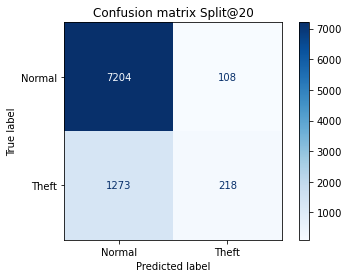

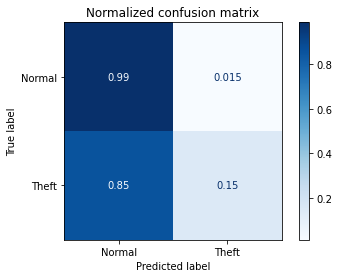

In [23]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [24]:
roc_auc_score(y_test,y_pred)

0.5657201781073017

In [25]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

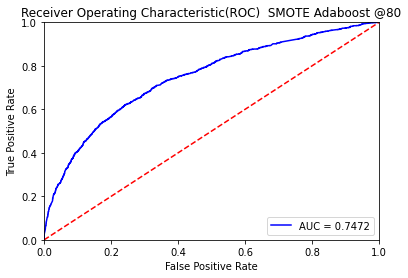

In [26]:
plt.title("Receiver Operating Characteristic(ROC)  SMOTE Adaboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [27]:
accuracy_score(y_test,y_pred)

0.8431216630694082

## considering when we don't use the over sampling in our dataset but 0_1

### considering an 80 @ 20 split

In [28]:
X_0_1

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000631,0.000727,0.000597,0.000798,0.000439,0.000576,0.000621,0.000535,0.000734,0.000675
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000963,0.001617,0.001315,0.001450,0.001718,0.001258,0.001240,0.001152,0.001138,0.001367
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001127,0.001362,0.001273,0.001249,0.001570,0.001370,0.001199,0.001366,0.001159,0.001173
3,0.000874,0.002256,0.002614,0.000586,0.000744,0.001283,0.000664,0.001038,0.000799,0.000862,...,0.001250,0.000921,0.000625,0.000512,0.000489,0.000443,0.000502,0.000772,0.000790,0.000873
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000221,0.000268,0.000216,0.000062,0.000033,0.000028,0.000128,0.000030,0.000030,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000288,0.000279,0.000203,0.000252,0.000240,0.000186,0.000170,0.000241,0.000288,0.000254
40252,0.000814,0.000000,0.000000,0.001009,0.001246,0.001393,0.000431,0.001139,0.001286,0.001107,...,0.000338,0.000596,0.000230,0.000432,0.000290,0.000306,0.000248,0.000441,0.000485,0.000477
40253,0.000175,0.000464,0.000344,0.000173,0.000317,0.000331,0.000125,0.000197,0.000279,0.000212,...,0.000087,0.000055,0.000048,0.000046,0.000039,0.000034,0.000053,0.000047,0.000031,0.000065
40254,0.005090,0.006060,0.007210,0.003032,0.003461,0.004192,0.002508,0.006765,0.002794,0.003490,...,0.001376,0.001485,0.000962,0.000870,0.000962,0.000735,0.000816,0.000933,0.001068,0.001040


In [29]:
y_0_1

0        1
1        1
2        1
3        1
4        1
        ..
40251    0
40252    0
40253    0
40254    0
40255    0
Name: FLAG, Length: 40256, dtype: int64

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=0)

In [31]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [32]:
y_pred = model_ada.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7312
           1       0.59      0.08      0.14       740

    accuracy                           0.91      8052
   macro avg       0.75      0.54      0.55      8052
weighted avg       0.88      0.91      0.88      8052



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[7270   42]
 [ 679   61]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99425602 0.00574398]
 [0.91756757 0.08243243]]


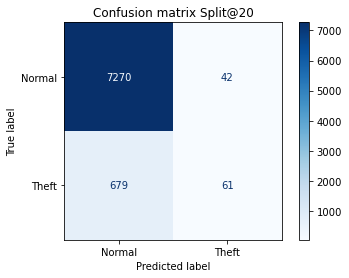

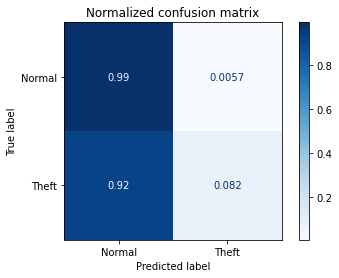

In [34]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [35]:
roc_auc_score(y_test,y_pred)

0.5383442249689514

In [36]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

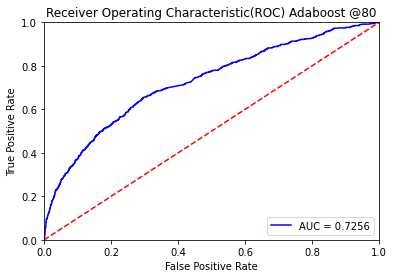

In [37]:
plt.title("Receiver Operating Characteristic(ROC) Adaboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### considering an 60 @ 40 split

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.4, random_state=0)

In [39]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [40]:
y_pred = model_ada.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     14685
           1       0.59      0.06      0.11      1418

    accuracy                           0.91     16103
   macro avg       0.75      0.53      0.53     16103
weighted avg       0.89      0.91      0.88     16103



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@40
[[14623    62]
 [ 1328    90]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.995778   0.004222  ]
 [0.93653032 0.06346968]]


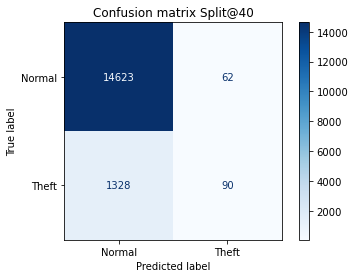

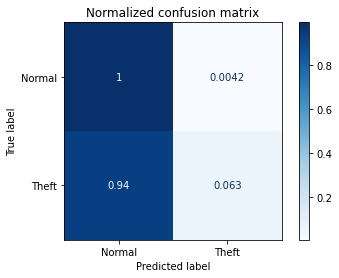

In [42]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@40",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [43]:
roc_auc_score(y_test,y_pred)

0.5296238401831023

In [44]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

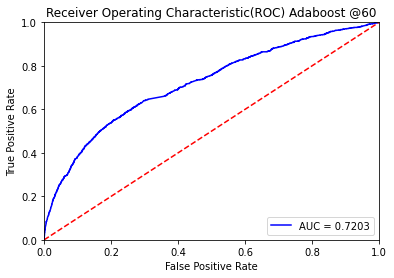

In [45]:
plt.title("Receiver Operating Characteristic(ROC) Adaboost @60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### considering that we don't make the scaling continous

In [46]:
df =pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [47]:
X= df.drop(["CONS_NO","FLAG"],axis=1)

In [48]:
X= np.array(X)

In [49]:
X

array([[0.        , 0.        , 0.        , ..., 0.2774024 , 0.33700344,
        0.24796978],
       [0.        , 0.        , 0.        , ..., 0.49527583, 0.43279488,
        0.41633648],
       [0.        , 0.        , 0.        , ..., 0.36504928, 0.27407127,
        0.22213798],
       ...,
       [0.04801325, 0.09602649, 0.07615894, ..., 0.05463576, 0.03228477,
        0.05380795],
       [0.34947238, 0.31346989, 0.39892406, ..., 0.27229464, 0.27581212,
        0.21498034],
       [0.        , 0.        , 0.        , ..., 0.4194019 , 0.26112327,
        0.19146608]])

In [50]:
y = df.FLAG

In [51]:
 y= np.array(y)

In [52]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [59]:
y_pred = model_ada.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7312
           1       0.86      0.01      0.02       740

    accuracy                           0.91      8052
   macro avg       0.88      0.50      0.48      8052
weighted avg       0.90      0.91      0.87      8052



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[7311    1]
 [ 734    6]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[9.99863239e-01 1.36761488e-04]
 [9.91891892e-01 8.10810811e-03]]


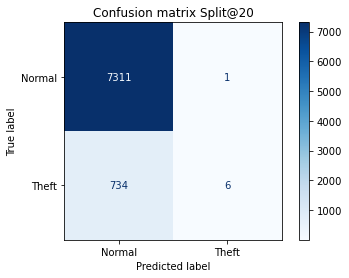

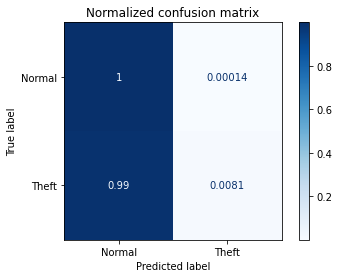

In [64]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [65]:
roc_auc_score(y_test,y_pred)

0.5039856733100715

In [66]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

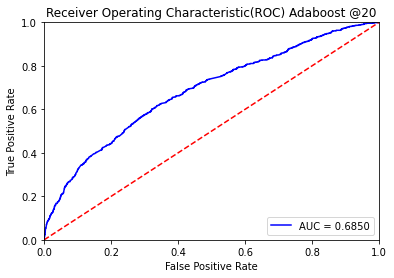

In [67]:
plt.title("Receiver Operating Characteristic(ROC) Adaboost @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### considering when the data is balanced

In [68]:
df =pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [69]:
flag_1_calc = df.loc[df["FLAG"]==1]

In [70]:
flag_0_calc = df.loc[df["FLAG"]==0]

In [71]:
len(flag_1_calc)

3579

In [72]:
flag_sample_0= flag_0_calc.sample(3*len(flag_1_calc))

In [73]:
frames = [flag_1_calc,flag_sample_0]

In [74]:
res_df=pd.concat(frames)

In [75]:
shuf_df= shuffle(res_df,random_state=0)

In [76]:
X= shuf_df.drop(["CONS_NO","FLAG"],axis=1)

In [77]:
y= shuf_df.FLAG

In [78]:
X = np.array(X.values)

In [79]:
y = np.array(y.values)

In [80]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [82]:
y_pred = model_ada.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2142
           1       0.62      0.16      0.26       722

    accuracy                           0.76      2864
   macro avg       0.70      0.56      0.56      2864
weighted avg       0.73      0.76      0.71      2864



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[2069   73]
 [ 604  118]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.9659197 0.0340803]
 [0.8365651 0.1634349]]


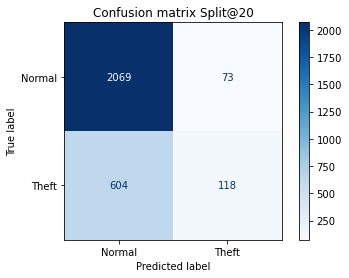

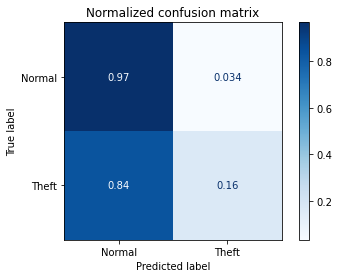

In [84]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [85]:
roc_auc_score(y_test,y_pred)

0.5646773021304551

In [86]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

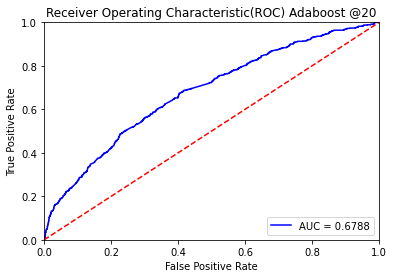

In [87]:
plt.title("Receiver Operating Characteristic(ROC) Adaboost @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### equal percentage
influence of  the data equivalence

In [88]:
flag_sample_0= flag_0_calc.sample(2*len(flag_1_calc))

In [89]:
frames = [flag_1_calc,flag_sample_0]

In [90]:
res_df=pd.concat(frames)

In [91]:
shuf_df= shuffle(res_df,random_state=0)

In [92]:
X= shuf_df.drop(["CONS_NO","FLAG"],axis=1)

In [93]:
y= shuf_df.FLAG

In [94]:
X = np.array(X.values)

In [95]:
y = np.array(y.values)

In [96]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [98]:
y_pred = model_ada.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1440
           1       0.60      0.28      0.38       708

    accuracy                           0.70      2148
   macro avg       0.66      0.59      0.59      2148
weighted avg       0.68      0.70      0.66      2148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Split@20
[[1310  130]
 [ 513  195]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.90972222 0.09027778]
 [0.72457627 0.27542373]]


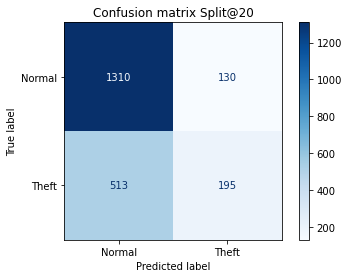

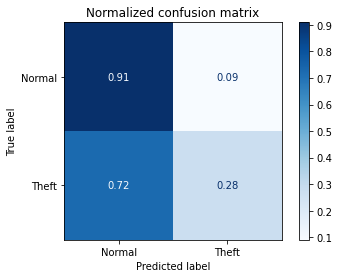

In [100]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Split@20",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [101]:
roc_auc_score(y_test,y_pred)

0.5925729755178908

In [102]:
probs = model_ada.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

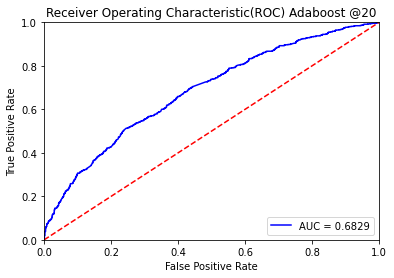

In [103]:
plt.title("Receiver Operating Characteristic(ROC) Adaboost @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()